<a href="https://www.kaggle.com/code/gosberex/taskdataset?scriptVersionId=250687026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import torchvision
from torchvision import transforms
import torch
from torchtune.datasets import ConcatDataset 



In [3]:
transformer = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor()
])

In [4]:
datadir = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0"
data_set = torchvision.datasets.ImageFolder(datadir, transformer)
data_set.classes

datadir1 = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1"
data_set1 = torchvision.datasets.ImageFolder(datadir1, transformer)
data_set1.classes

datadir2 = "/kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2"
data_set2 = torchvision.datasets.ImageFolder(datadir2, transformer)
data_set2.classes

concat_dataset = ConcatDataset([data_set, data_set1, data_set2])



In [5]:
x, y = concat_dataset[15]

x


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [6]:
len(concat_dataset)

10661

In [7]:
from torch.utils.data import random_split

train_dataset, test_dataset = random_split(concat_dataset, [0.8, 0.2])
print(len(test_dataset))
len(train_dataset)


2132


8529

In [18]:
from torch.utils.data import DataLoader


batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



In [9]:
for x, y in train_loader:
    break

y

tensor([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [10]:
x.shape

torch.Size([12, 3, 64, 64])

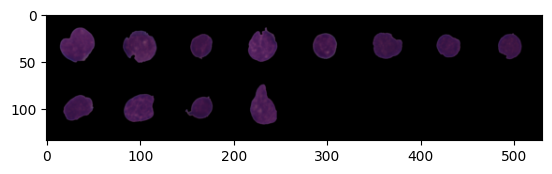

In [11]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


grid = make_grid(x).permute(1, 2, 0) # результатом є тензор

plt.imshow(grid)

In [12]:
x.device

device(type='cpu')

# Візуалізація графіків

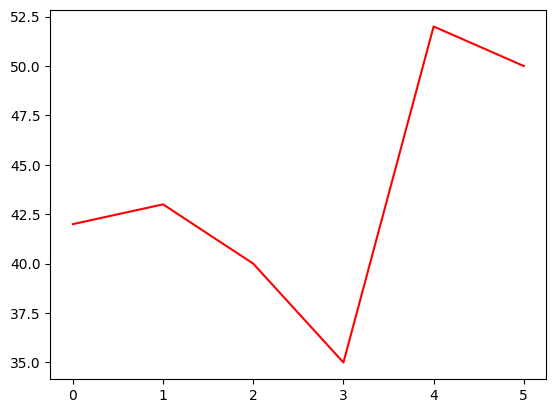

In [13]:
import matplotlib.pyplot as plt
numbers = (42, 43, 40, 35, 52, 50)
plt.plot(numbers, color="red")

Text(0.5, 1.0, 'Grafic test')

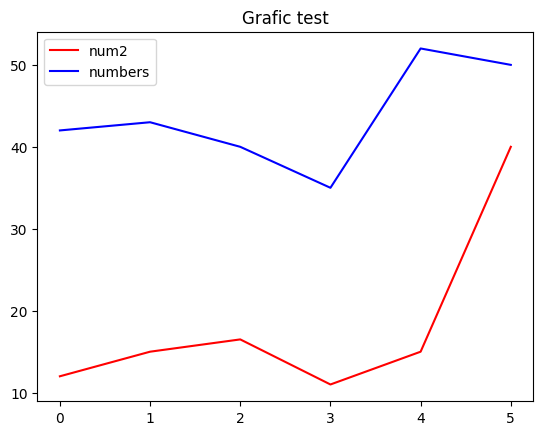

In [14]:
num2= (12, 15, 16.5 ,11, 15,40)

plt.plot(num2, color="red", label="num2")
plt.plot(numbers, color="blue", label="numbers")
plt.legend()
plt.title("Grafic test")

# Швидкість


In [15]:
import time

numbers2 = list(range(100000000))
start = time.time()
sum1 = sum(numbers2)
fin = time.time()
print("Python")
print(fin - start)


Python
0.6701624393463135


In [16]:
num_ten = torch.tensor(numbers2)
start = time.time()
sum1 = torch.sum(num_ten)
fin = time.time()
print("Torch")
print(fin - start)

Torch
0.0348668098449707


In [17]:
data_set.classes

['all', 'hem']

In [21]:
from torch import nn
import torch.nn.functional as F

class LeikModal(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,8, 3, padding="same")
        self.conv2 = nn.Conv2d(8, 16, 3, padding="same")
        self.conv3 = nn.Conv2d(16, 32, 3, padding="same")
        self.pooling = nn.MaxPool2d(2,2)
        self.Flatting = nn.Flatten()
        
        self.lin1 = nn.Linear(2048,200)
        self.lin2 = nn.Linear(200, 2)
        
        
    def forward(self, img):
        #3*64*64
        conv1 = self.conv1(img) #8*64*64
        relu1 = F.relu(conv1)
        pool1 = self.pooling(relu1) #8*32*32

        conv2 = self.conv2(pool1)  # 16*32*32
        relu2 = F.relu(conv2)
        pool2 = self.pooling(relu2)  # 16*16*16

        conv3 = self.conv3(pool2)  # 32*16*16
        relu3 = F.relu(conv3)
        pool3 = self.pooling(relu3)  # 32*8*8
        
        flat = self.Flatting(pool3) #2048
        
        lin1 = self.lin1(flat) #200
        relu4 = F.relu(lin1)

        lin2 = self.lin2(relu4) #2
        
        return lin2

model = LeikModal()
device = "cuda"
model = model.to(device)

In [23]:
# Функція втрат для класифікації
loss_fn = nn.CrossEntropyLoss()

# Оптимізатор (Adam) для оновлення ваг моделі
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [24]:
epochs = 10
losses = []
losses_test = []
for epoch in range(epochs):
    losses2 = []
    for img, label in train_loader:
        img, label = img.to(device), label.to(device)
        pred = model(img)
        loss = loss_fn(pred, label)
        losses2.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(sum(losses2) / len(losses2))
    
    loss_test = []
    for img, label in test_loader:
        img, label = img.to(device), label.to(device)
        pred = model(img)
        loss = loss_fn(pred, label)
        loss_test.append(loss.item())
    losses_test.append(sum(loss_test) / len(loss_test))
    
    print(losses[-1], losses_test[-1])

0.5365440774319777 0.4699651143130134
0.4697232651176737 0.43988457322120667
0.4556475335092687 0.4396914524190566
0.4570971104636121 0.43741436916239124
0.45946043774263184 0.43314539684968834
0.4551519306737985 0.43354923058958617
0.45060817430268474 0.43089957798228545
0.4561118559161229 0.4361586903824526
0.45056406686555095 0.4313474788385279
0.44614642725062015 0.4372429321793949


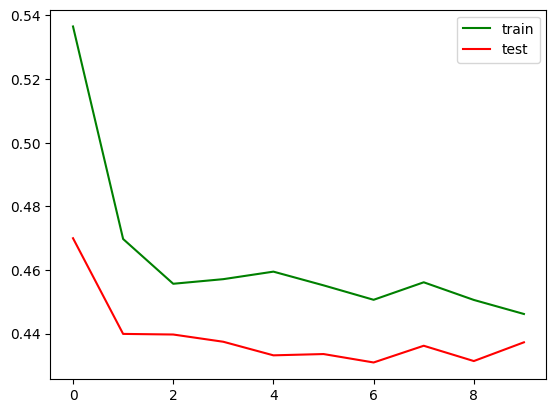

In [26]:
import matplotlib.pyplot as plt

plt.plot(losses, label='train', color='green')
plt.plot(losses_test, label='test', color='red')
plt.legend()